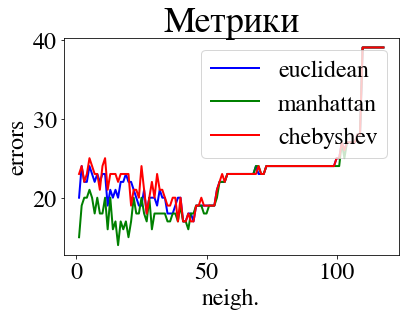

ValueError: Metric '['euclidean', 'manhattan', 'chebyshev']' not valid for algorithm 'auto'

In [24]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

from matplotlib import pylab as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

data = pd.read_csv('data.txt', header = None)
data.head()

mistakes = [[],[],[]]

Y = data[0]
X = data.drop([0], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 45)

i = 0
for metrics in ("euclidean" ,"manhattan", "chebyshev"):
    for n in range(1, len(X_train / 2) ):
        clas = KNeighborsClassifier( n  ,metric = metrics)
        clas.fit(X_train, Y_train)
        prediction_Y = clas.predict(X_test)
        mistakes[i].append((prediction_Y != Y_test).sum())
    i = i + 1
metrics =  ["euclidean" ,"manhattan", "chebyshev"]
colours = ['blue','green','red']
for i in range(3):
     plt.plot(range(1, len(X_train/2)), mistakes[i], color = colours[i], label =  metrics[i])
plt.xlabel('neigh.')
plt.ylabel('errors')
plt.legend(loc = 'upper right')
plt.title("Метрики")
plt.show()


#Graphics of errors(training test and real)
errors = [];
test = np.arange(0.1 , 0.8, 0.005)
for j in test:
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = j, random_state = 45)
    clas = KNeighborsClassifier( n  ,metric = metrics)
    clas.fit(X_train, Y_train)
    prediction_Y = clas.predict(X_test)
    errors.append((prediction_Y != Y_test).sum())
plt.plot(test, errors)
plt.show()